In [1]:
import numpy as np
import ev_convert as ev
import matplotlib.pyplot as plt

In [2]:
t = [np.nan, 0.001, 0.005, 0.01, 0.05, 0.1, 0.12, 0.5, 1., 5., 10.]
data = np.genfromtxt('cond03.txt')
a = np.column_stack((data[1:25, 0], data[1:25,11], data[25:49,11], data[49:73,11], data[73:97,11], data[97:121,11], data[121:145,11], data[145:169,11], data[169:193,11], data[193:217,11], data[217:241,11]))
a = a.T
a = np.column_stack((t, a))
np.savetxt('L_abs_models.txt', a, fmt= '%1.4f')
# saved as an array with n colums = mass, m rows = age, where the 1st row and column are the masses and ages respectively

In [3]:
age = a[1:,0]
mag = a[1:,1:]
mass = a[0,1:]

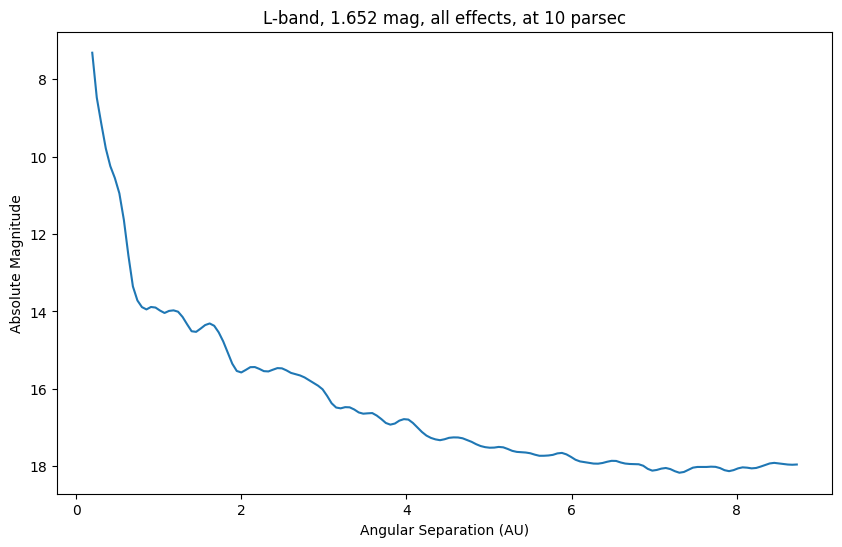

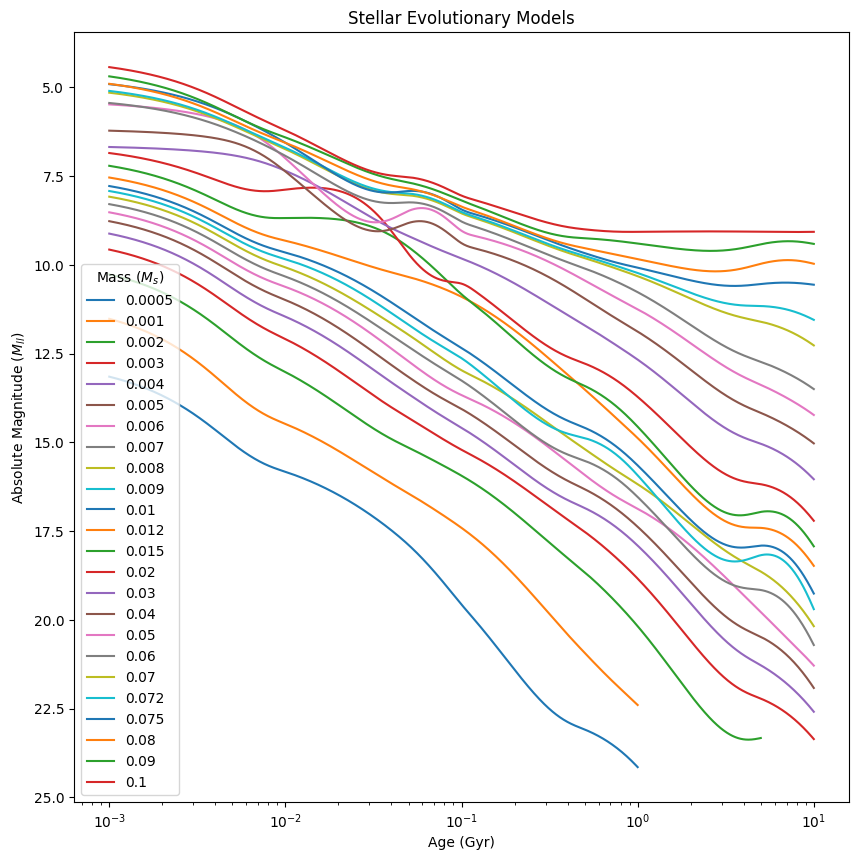

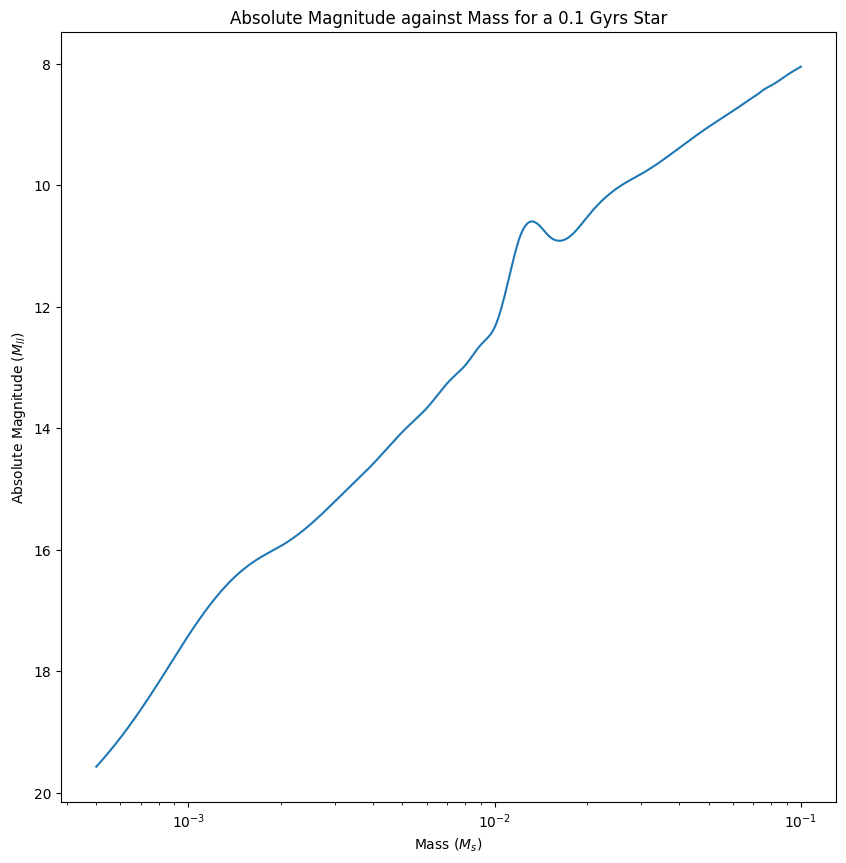

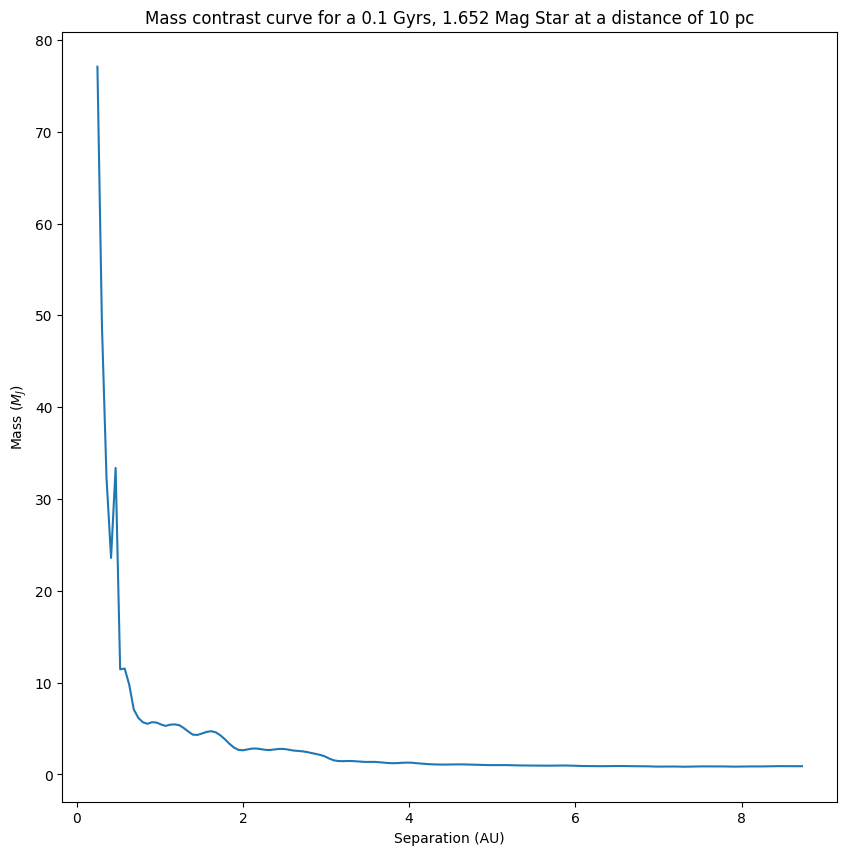

In [4]:
# METIS data for L-band 1.652 mag star
stellar_mag = 1.652
distance = 10
mag_data, sep_data = ev.mag_contrast_plot('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/science_case_Dec2020/cc_adi_bckg1_mag1.652_L_CVC_fullM1_all_effects.fits', stellar_mag, distance, 'L', 'all effects')
ev.convert(age, mag, mass, 0.1, mag_data, sep_data, stellar_mag, distance, 'C:/Users/bryce/Downloads/')

In [5]:
import species
species.SpeciesInit()

c:\Users\bryce\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


problem: Could not find module 'libmultinest.dll' (or one of its dependencies). Try using the full path with constructor syntax.


c:\Users\bryce\anaconda3\Lib\site-packages\species\analysis\fit_evolution.py:18: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


problem: Could not find module 'libmultinest.dll' (or one of its dependencies). Try using the full path with constructor syntax.


c:\Users\bryce\anaconda3\Lib\site-packages\species\analysis\fit_model.py:27: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


problem: Could not find module 'libmultinest.dll' (or one of its dependencies). Try using the full path with constructor syntax.


c:\Users\bryce\anaconda3\Lib\site-packages\species\analysis\retrieval.py:24: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


species v0.7.4
Working folder: c:\Users\bryce\Python\High Contrast Imaging Project\Year_4
Configuration settings:
   - Database: c:\Users\bryce\Python\High Contrast Imaging Project\Year_4\species_database.hdf5
   - Data folder: c:\Users\bryce\Python\High Contrast Imaging Project\Year_4\data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03


In [6]:
database = species.Database()
database.add_isochrones(model='atmo')

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong


In [7]:
read_iso = species.ReadIsochrone(tag='atmo-ceq')

In [8]:
print(read_iso.get_filters())

['MKO_Y', 'MKO_J', 'MKO_H', 'MKO_K', 'MKO_Lp', 'MKO_Mp', 'W1', 'W2', 'W3', 'W4', 'IRAC_CH1', 'IRAC_CH2']


In [9]:
iso_box = read_iso.get_isochrone(age=50.,masses=np.linspace(5., 30., 50), filter_mag='MKO_Lp', filters_color=('MKO_K', 'MKO_Mp'))

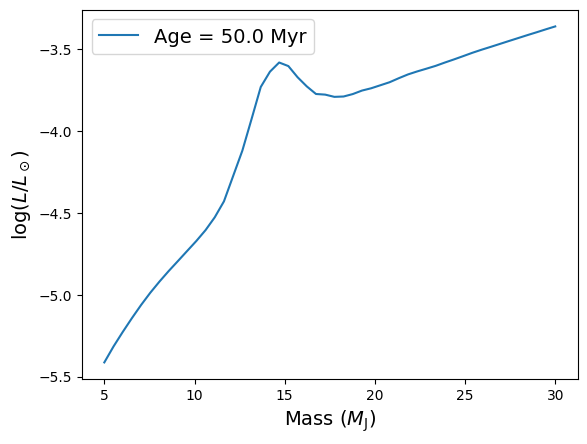

In [10]:
plt.plot(iso_box.mass, iso_box.log_lum, label=f'Age = {iso_box.age} Myr')
plt.xlabel(r'Mass ($M_\mathrm{J}$)', fontsize=14)
plt.ylabel(r'$\log(L/L_\odot)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [11]:
masses = read_iso.contrast_to_mass(age=20.,
                                   distance=50.,
                                   filter_name='MKO_Lp',
                                   star_mag=10.,
                                   contrast=[1e-4, 1e-5, 1e-6],
                                   use_mag=False)
print(masses)

The 'MKO_Lp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
[1.03651186        nan        nan]


The 'MKO_Lp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.


Text(0.5, 1.0, 'Mass contrast curve for a 100.0 Myrs, 1.652 Mag Star at a distance of 10.0 pc')

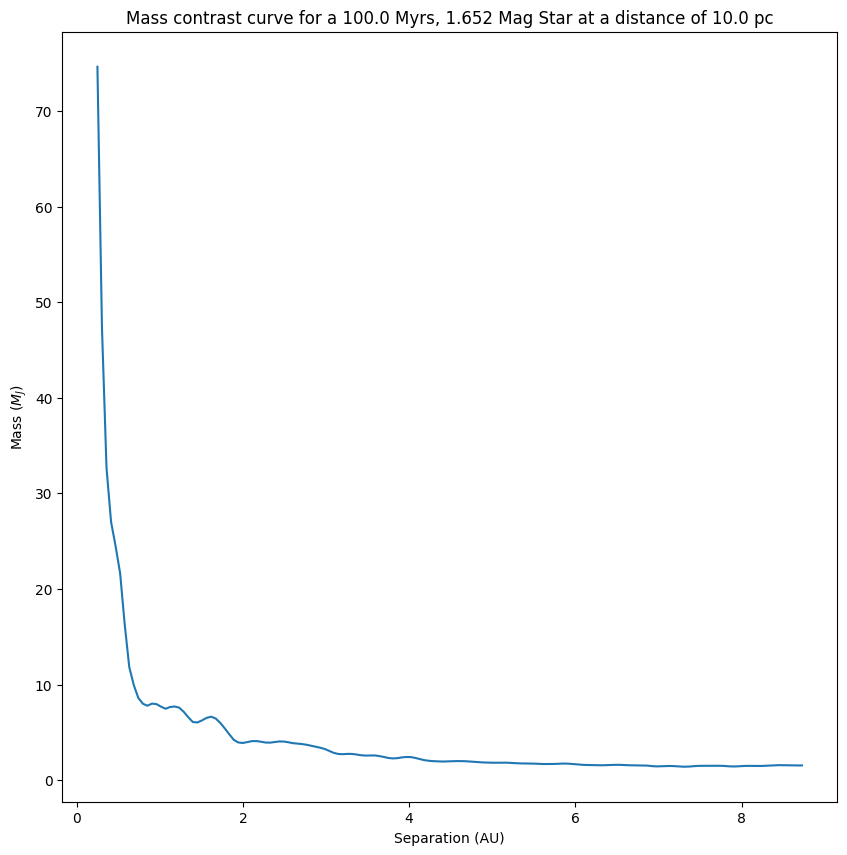

In [12]:
import astropy.io.fits as fits
data = fits.getdata('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/science_case_Dec2020/cc_adi_bckg1_mag1.652_L_CVC_fullM1_all_effects.fits', ext=0)
x = data[0,:]
y = data[1,:]
distance = 10.
age = 100.
stellar_mag = 1.652
x = ev.arc_to_au(x, distance)
masses = read_iso.contrast_to_mass(age=age,
                                   distance=distance,
                                   filter_name='MKO_Lp',
                                   star_mag=stellar_mag,
                                   contrast=y,
                                   use_mag=False)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(x, masses)
ax.set_ylabel('Mass ($M_J$)')
ax.set_xlabel('Separation (AU)')
ax.set_title('Mass contrast curve for a {} Myrs, {} Mag Star at a distance of {} pc'.format(age, stellar_mag, distance))

In [13]:

from DMC import *

ID='test01'
dist=([10])
map=exodmc(ID, dist)
map.set_grid(x_min=1, x_max=100, logx=True)
xlim=[0.1,0.5,1]
ylim=[10,5,2]
prob = map.DImode(xlim, ylim)

<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(c

test01 time elapsed - 00:00:04.04


c:\Users\bryce\anaconda3\Lib\site-packages\DMC\exodmc.py:210: DeprecationWarning: invalid escape sequence '\%'
  CB.ax.set_yticklabels(["{:.0f}".format(i)+"\%" for i in CB.get_ticks()]) # set ticks of your format


RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x000001500A11A980> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 800x600 with 2 Axes>